# Mobile Price Classifier

### https://www.kaggle.com/iabhishekofficial/mobile-price-classification

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Load the data

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [5]:
train_df.shape, test_df.shape

((2000, 21), (1000, 21))

In [6]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Visualization

In [23]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Checking Null Values

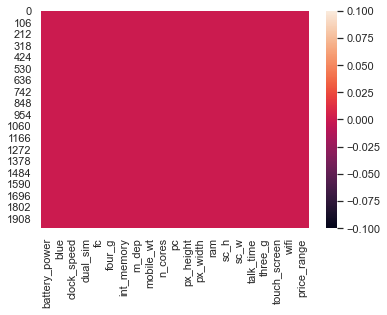

In [9]:
sns.heatmap(train_df.isnull())

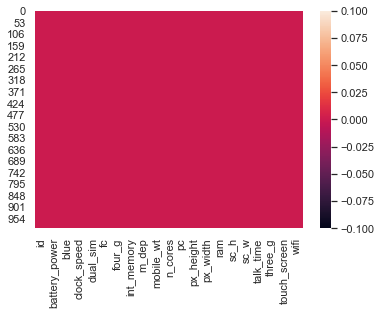

In [10]:
sns.heatmap(test_df.isnull())

### Battery Power

In [19]:
train_df['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

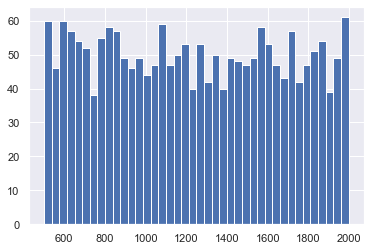

In [22]:
plt.hist(train_df['battery_power'],bins=40)
plt.show()

### Bluetooth

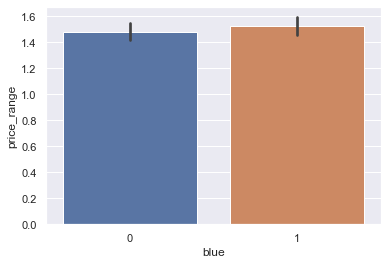

In [24]:
sns.barplot(train_df['blue'],train_df['price_range'])

### No of cores

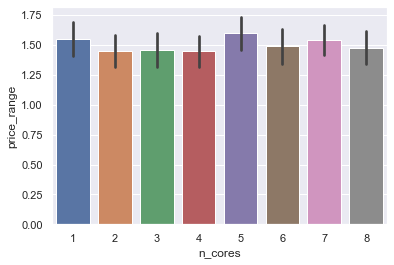

In [27]:
sns.barplot(train_df['n_cores'],train_df['price_range'])

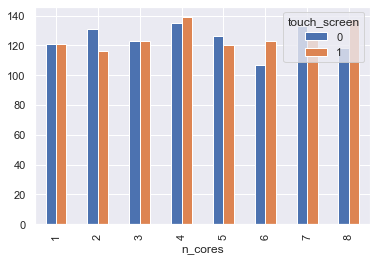

In [46]:
pd.crosstab(train_df['n_cores'],train_df['touch_screen']).plot(kind='bar')

### Ram

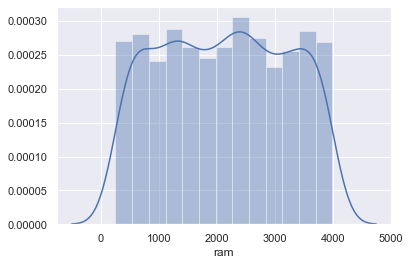

In [33]:
sns.distplot(train_df['ram'])

### Touch Screen 

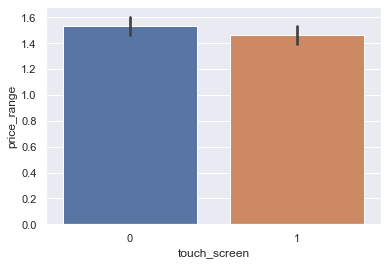

In [34]:
sns.barplot(train_df['touch_screen'],train_df['price_range'])

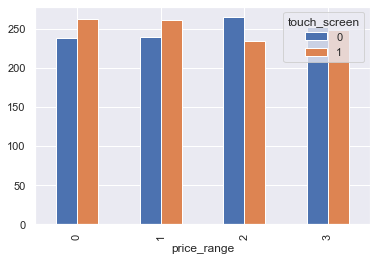

In [47]:
pd.crosstab(train_df['price_range'],train_df['touch_screen']).plot(kind='bar')

### Dual Sim

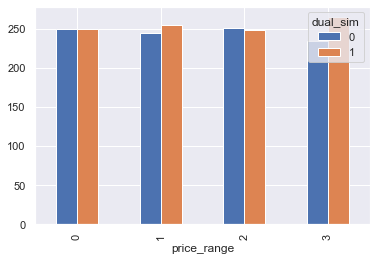

In [51]:
pd.crosstab(train_df['price_range'],train_df['dual_sim']).plot(kind='bar')

### Dependent & Independent Variables

In [91]:
train_df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

- 0 (low cost)
- 1 (medium cost)
- 2 (high cost)
- 3 (very high cost)

In [92]:
X = train_df.drop('price_range',axis=1).values
y = train_df['price_range'].values

## Train Test Split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Standardization

In [94]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## ANN Model Training

In [96]:
model = Sequential()

model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(units=4,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=25)

In [98]:
model.fit(x=scaled_X_train, y=y_train, 
          validation_data=(scaled_X_test,y_test),
          epochs=500,
          callbacks=[early_stop])

Epoch 1/500
50/50 [==============================] - 1s 8ms/step - loss: 1.4308 - accuracy: 0.2513 - val_loss: 1.3906 - val_accuracy: 0.2450
Epoch 2/500
50/50 [==============================] - 0s 5ms/step - loss: 1.3841 - accuracy: 0.2497 - val_loss: 1.3810 - val_accuracy: 0.2900
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 1.3744 - accuracy: 0.2917 - val_loss: 1.3625 - val_accuracy: 0.3450
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 1.3523 - accuracy: 0.3297 - val_loss: 1.3280 - val_accuracy: 0.4050
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 1.3087 - accuracy: 0.3909 - val_loss: 1.2615 - val_accuracy: 0.4275
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 1.2359 - accuracy: 0.4088 - val_loss: 1.1486 - val_accuracy: 0.4475
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 1.1053 - accuracy: 0.4644 - val_loss: 1.0323 - val_accuracy: 0.4350
Epoch 8/500
5

Epoch 59/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9582 - val_loss: 0.1242 - val_accuracy: 0.9500
Epoch 60/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 0.9578 - val_loss: 0.1225 - val_accuracy: 0.9475
Epoch 61/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9561 - val_loss: 0.1511 - val_accuracy: 0.9325
Epoch 62/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9573 - val_loss: 0.1484 - val_accuracy: 0.9400
Epoch 63/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 0.9588 - val_loss: 0.1354 - val_accuracy: 0.9450
Epoch 64/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9587 - val_loss: 0.1296 - val_accuracy: 0.9500
Epoch 65/500
50/50 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9664 - val_loss: 0.1202 - val_accuracy: 0.9575
Epoch 

## Model Evaluation

In [99]:
eval_df = pd.DataFrame(model.history.history)

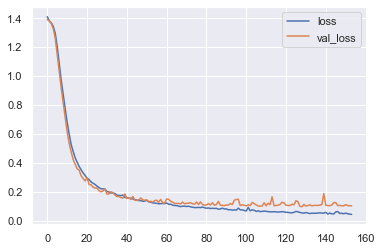

In [100]:
eval_df[['loss','val_loss']].plot()

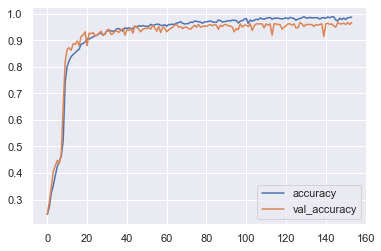

In [101]:
eval_df[['accuracy','val_accuracy']].plot()

In [102]:
loss,acc= model.evaluate(scaled_X_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.1027 - accuracy: 0.9675


In [107]:
print('Accuracy on Test Dataset:',round(acc*100),"%")

Accuracy on Test Dataset: 97 %


## New Prediction

In [110]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [113]:
test_df.drop('id',inplace=True,axis=1)

In [117]:
scaled_test_df = scaler.transform(test_df.values) 

In [120]:
prediction = np.argmax(model.predict(scaled_test_df), axis=-1)

## Single Prediction

In [128]:
battery_power = 043.0
blue = 1.0
clock_speed = 1.8
dual_sim = 1.0
fc = 14.0
four_g = 0.0
int_memory = 5.0
m_dep = 0.1
mobile_wt = 193.0
n_cores = 3.0
pc = 16.0
px_height = 226.0
px_width = 1412.0
ram = 3476.0
sc_h = 12.0
sc_w = 7.0
talk_time = 2.0
three_g = 0.0
touch_screen = 1.0
wifi =   0.0

In [129]:
data = [[
    battery_power ,
    blue,
    clock_speed ,
    dual_sim ,
    fc ,
    four_g ,
    int_memory ,
    m_dep ,
    mobile_wt ,
    n_cores ,
    pc,
    px_height ,
    px_width ,
    ram,
    sc_h ,
    sc_w ,
    talk_time ,
    three_g,
    touch_screen ,
    wifi ,
]]

In [130]:
scaled_data = scaler.transform(data)

In [131]:
prediction = np.argmax(model.predict(scaled_data), axis=-1)

if prediction == 0:
    print('Low Cost')
elif prediction == 1:
    print('Medium Cost')
elif prediction == 2:
    print('High Cost')
elif prediction == 3:
    print('Very High Cost')

High Cost


## Model Training (Complete Dataset)

In [133]:
scaled_X = scaler.transform(X)

In [141]:
model = Sequential()

model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(units=4,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
model.fit(scaled_X,y,epochs=150)

Epoch 1/150
63/63 [==============================] - 1s 974us/step - loss: 1.4598 - accuracy: 0.2384
Epoch 2/150
63/63 [==============================] - 0s 1ms/step - loss: 1.3686 - accuracy: 0.2661
Epoch 3/150
63/63 [==============================] - 0s 1ms/step - loss: 1.3348 - accuracy: 0.3640
Epoch 4/150
63/63 [==============================] - 0s 965us/step - loss: 1.2380 - accuracy: 0.4649
Epoch 5/150
63/63 [==============================] - 0s 981us/step - loss: 1.0860 - accuracy: 0.4853
Epoch 6/150
63/63 [==============================] - 0s 997us/step - loss: 0.9308 - accuracy: 0.5358
Epoch 7/150
63/63 [==============================] - 0s 1ms/step - loss: 0.7564 - accuracy: 0.7404
Epoch 8/150
63/63 [==============================] - 0s 997us/step - loss: 0.6059 - accuracy: 0.8030
Epoch 9/150
63/63 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.8465
Epoch 10/150
63/63 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8663

In [146]:
model_accuracy = model.history.history['accuracy'][-1] * 100

In [149]:
print('Model Accuracy:',round(model_accuracy,2))

Model Accuracy: 98.5


### Saving Model

In [151]:
model.save('mob_price_model.h5')

In [152]:
import joblib

joblib.dump(scaler,'mob_price_scaler.pkl')

['mob_price_scaler.pkl']